In [ ]:
#Subset the isoforms, bar plot, at 5000 Files.
#look at rev_sp and sp. 
#9 version of triple experiments. 
#count isoforms in there and protein size in there. 

In [ ]:
#Doing this for multiple CSV Files to form ProteinIDs

In [2]:
import csv
import glob

# Replace '/path/to/directory/' with the actual path to your directory containing the input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/*.txt'):
    # Generate output file name by replacing '.txt' with '.csv'
    output_file_path = file_path.replace('.txt', '.csv')

    with open(file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over each line in the input file
        for line in input_file:
            # Split the line into fields using the tab delimiter
            fields = line.strip().split('\t')

            # Write the fields to the CSV file
            writer.writerow(fields)

In [3]:
import pandas as pd
import glob
import os

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/*.csv'):
    # Generate output file name by prefixing 'SeparateProteinIDs_' to the input file name
    output_file_path = os.path.join('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/', 'SeparateProteinIDs_' + os.path.basename(file_path))

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)


In [ ]:
#Checking one dataframe to see correct formatting

In [4]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/SeparateProteinIDs_Classic_no_grouping_no_remap_5000_RANDOM_1.csv')
print(df)

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000353           sp          Q96QK1   VPS35_HUMAN
1      0.000353           sp          O00471   EXOC5_HUMAN
2      0.000353           sp          Q14204   DYHC1_HUMAN
3      0.000353           sp          P32119   PRDX2_HUMAN
4      0.000353           sp          P02786    TFR1_HUMAN
...         ...          ...             ...           ...
50277  0.987824           sp          Q9ULZ1    APEL_HUMAN
50278  0.987824           sp        Q06330-3     SUH_HUMAN
50279  0.987824           sp          Q5VU36   S31A5_HUMAN
50280  0.987824           sp        Q6P9G9-2   ZN449_HUMAN
50281  0.987824           sp          P04090    REL2_HUMAN

[50282 rows x 4 columns]


In [ ]:
#Counting the number of isoforms in one file to double check formatting

In [6]:
import pandas as pd
import re

# read in the unmerged csv1 dataframe
unmerged_csv = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/SeparateProteinIDs_Classic_rescued_subset_no_remap_5000_RANDOM_1.csv')

# extract the names and count of isoforms
isoforms = []
for protein_id in unmerged_csv['Protein Uniprot']:
    matches = re.findall(r'(\w+-\d+)', protein_id)
    if matches:
        isoforms.extend(matches)
        
isoform_count = len(isoforms)
unique_isoforms = set(isoforms)

print(f'Total number of isoforms: {isoform_count}')
print(f'Unique isoforms: {unique_isoforms}')


Total number of isoforms: 10888
Unique isoforms: {'Q66PJ3-6', 'Q5T7B8-4', 'P67812-3', 'Q8IVF2-3', 'P53667-2', 'P13591-3', 'Q9BSY9-2', 'Q9C0H6-2', 'O60840-6', 'Q92896-2', 'Q9UBT6-2', 'P0CAP1-2', 'Q6UXF7-2', 'Q18PE1-2', 'Q6P9G9-2', 'Q1MX18-3', 'Q06210-2', 'Q8WU90-2', 'Q8N1K5-2', 'Q6PKG0-3', 'Q14194-2', 'Q9NSD5-3', 'Q9BUP0-2', 'Q8N4T4-4', 'Q9P246-3', 'P56181-2', 'Q9Y6M7-13', 'Q13393-2', 'O95498-4', 'Q8IVM8-2', 'A6NC86-2', 'P26378-5', 'Q13286-6', 'Q12791-7', 'Q15149-5', 'Q5SVQ8-2', 'Q13555-7', 'Q96D71-4', 'Q9NSA0-2', 'Q14142-3', 'Q6R327-4', 'Q9Y272-2', 'Q9Y6X9-2', 'Q68CR1-2', 'P13942-3', 'Q4G1C9-3', 'Q8WXI4-2', 'Q8NDW4-2', 'P49715-2', 'A4D1B5-2', 'A4FU69-5', 'O95256-3', 'Q86TI4-2', 'Q9Y238-2', 'Q3KQZ1-2', 'Q5T9C9-2', 'Q6ZV50-3', 'Q9UHD0-3', 'Q7Z4H8-3', 'Q96JK2-3', 'Q8IUI8-2', 'Q99569-2', 'Q7Z460-5', 'Q12857-3', 'Q9UBT6-4', 'Q8WYA1-3', 'Q99062-4', 'O95238-2', 'O15296-3', 'P00973-4', 'Q9NYG5-2', 'P16157-22', 'Q9BY08-2', 'Q58F21-4', 'Q86V25-2', 'Q8IXI2-6', 'Q99873-3', 'P07902-2', 'Q9BT09-2', 

In [ ]:
#Checking isoform count in all the files.

In [7]:
import pandas as pd
import re
import os

# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/'

# create an empty dictionary to store the filename and isoform count
isoform_counts = {}

# loop through all CSV files in the folder and merge them with the human proteome CSV
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # read in the CSV file
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        # extract the names and count of isoforms
        isoforms = []
        for protein_id in csv_file['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_count = len(isoforms)
        # store the filename and isoform count in the dictionary
        isoform_counts[file_name] = isoform_count

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame(list(isoform_counts.items()), columns=['File Name', 'Isoform Count'])

# save the DataFrame to a CSV file
isoform_counts_df.to_csv(os.path.join(folder_path, 'Isoform_Counts_All_Methods.csv'), index=False)


In [8]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/Isoform_Counts_All_Methods.csv')
print(df)

                                            File Name  Isoform Count
0   SeparateProteinIDs_Classic_subset_no_remap_500...          14831
1   SeparateProteinIDs_Classic_subset_no_remap_500...          15058
2   SeparateProteinIDs_Classic_subset_no_remap_500...          14959
3   SeparateProteinIDs_Picked_protein_group_no_rem...           7111
4   SeparateProteinIDs_Picked_protein_group_no_rem...           7282
5   SeparateProteinIDs_Savitski_subset_no_remap_50...          12721
6   SeparateProteinIDs_Savitski_subset_no_remap_50...          12772
7   SeparateProteinIDs_Picked_protein_group_no_rem...           7189
8   SeparateProteinIDs_Savitski_subset_no_remap_50...          12562
9   SeparateProteinIDs_Savitski_no_remap_5000_RAND...          10521
10  SeparateProteinIDs_Savitski_rescued_subset_no_...           9810
11  SeparateProteinIDs_Picked_subset_no_remap_5000...           9755
12  SeparateProteinIDs_Savitski_rescued_subset_no_...           9949
13  SeparateProteinIDs_Savitski_no

In [12]:
import pandas as pd
import re
import os

# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/'

# create an empty dictionary to store the filename and isoform count
isoform_counts = {}

# loop through all CSV files in the folder and merge them with the human proteome CSV
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # read in the CSV file
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        # extract the names and count of isoforms
        isoforms = []
        for protein_id in csv_file['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_count = len(isoforms)
        # extract the method name from the file name
        method = re.search(r'SeparateProteinIDs_(.+)_\d+_RANDOM', file_name).group(1)
        # store the filename, isoform count, and method in the dictionary
        isoform_counts[file_name] = {'Isoform Count': isoform_count, 'Method': method}

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame.from_dict(isoform_counts, orient='index')
isoform_counts_df.index.name = 'File Name'

# save the DataFrame to a CSV file
isoform_counts_df.to_csv(os.path.join(folder_path, 'Isoform_Counts_All_Methods.csv'))


In [13]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/Isoform_Counts_All_Methods.csv')
print(df)

                                            File Name  Isoform Count  \
0   SeparateProteinIDs_Classic_subset_no_remap_500...          14831   
1   SeparateProteinIDs_Classic_subset_no_remap_500...          15058   
2   SeparateProteinIDs_Classic_subset_no_remap_500...          14959   
3   SeparateProteinIDs_Picked_protein_group_no_rem...           7111   
4   SeparateProteinIDs_Picked_protein_group_no_rem...           7282   
5   SeparateProteinIDs_Savitski_subset_no_remap_50...          12721   
6   SeparateProteinIDs_Savitski_subset_no_remap_50...          12772   
7   SeparateProteinIDs_Picked_protein_group_no_rem...           7189   
8   SeparateProteinIDs_Savitski_subset_no_remap_50...          12562   
9   SeparateProteinIDs_Savitski_no_remap_5000_RAND...          10521   
10  SeparateProteinIDs_Savitski_rescued_subset_no_...           9810   
11  SeparateProteinIDs_Picked_subset_no_remap_5000...           9755   
12  SeparateProteinIDs_Savitski_rescued_subset_no_...           

In [ ]:
#Plotting average isoform count for each of the methods. 

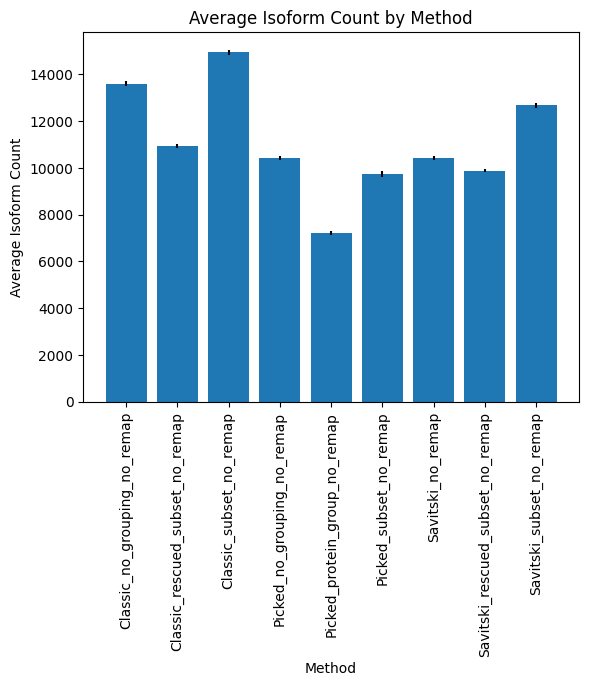

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/Isoform_Counts_All_Methods.csv')

# Group by method and calculate the mean isoform count and standard deviation for each group
grouped_df = df.groupby('Method')['Isoform Count'].agg(['mean', 'std']).reset_index()

# Plot the bar chart with error bars
plt.bar(grouped_df['Method'], grouped_df['mean'], yerr=grouped_df['std'])
plt.xlabel('Method')
plt.ylabel('Average Isoform Count')
plt.title('Average Isoform Count by Method')
plt.xticks(rotation=90)
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_802/1840037064.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(average_isoform_counts.index, rotation='vertical')


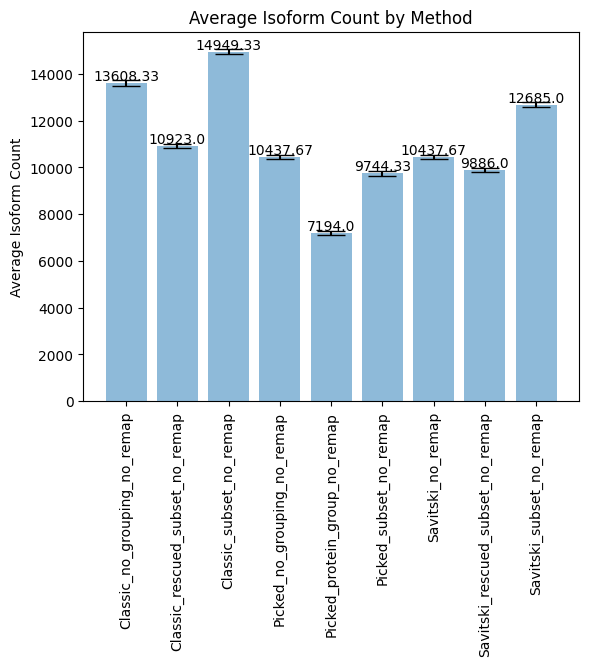

In [19]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt

# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots/'

# create an empty dictionary to store the filename, isoform count, and method
isoform_counts = {}

# loop through all CSV files in the folder and merge them with the human proteome CSV
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # read in the CSV file
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        # extract the names and count of isoforms
        isoforms = []
        for protein_id in csv_file['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_count = len(isoforms)
        # extract the method from the file name
        method = re.search(r'SeparateProteinIDs_(.+)_\d+_RANDOM', file_name).group(1)
        # store the filename, isoform count, and method in the dictionary
        isoform_counts[file_name] = {'Isoform Count': isoform_count, 'Method': method}

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame.from_dict(isoform_counts, orient='index')

# calculate the average isoform count for each unique method
average_isoform_counts = isoform_counts_df.groupby('Method')['Isoform Count'].mean()

# plot the results
fig, ax = plt.subplots()
ax.bar(average_isoform_counts.index, average_isoform_counts.values, yerr=isoform_counts_df.groupby('Method')['Isoform Count'].std(), align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticklabels(average_isoform_counts.index, rotation='vertical')
ax.set_ylabel('Average Isoform Count')
ax.set_title('Average Isoform Count by Method')

# add labels to the bars with the average isoform count
for i, v in enumerate(average_isoform_counts.values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_802/3316236597.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(average_isoform_counts.index, rotation='vertical')


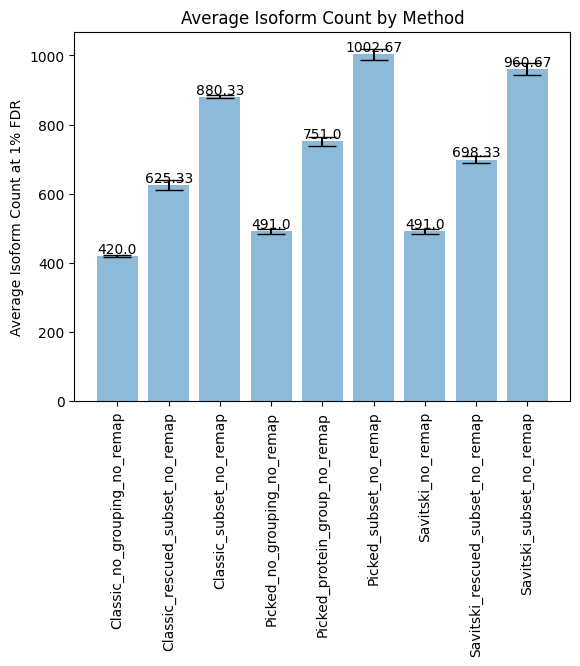

In [23]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt

# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Bar_plots_Isoform_Count/'

# create an empty dictionary to store the filename, isoform count, and method
isoform_counts = {}

# loop through all CSV files in the folder and merge them with the human proteome CSV
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # read in the CSV file
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        # filter the DataFrame to only include rows where the Q-value is less than 0.01
        filtered_csv_file = csv_file[csv_file['Q-value'] < 0.01]
        # extract the names and count of isoforms
        isoforms = []
        for protein_id in filtered_csv_file['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_count = len(isoforms)
        # extract the method from the file name
        method = re.search(r'SeparateProteinIDs_(.+)_\d+_RANDOM', file_name).group(1)
        # store the filename, isoform count, and method in the dictionary
        isoform_counts[file_name] = {'Isoform Count': isoform_count, 'Method': method}

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame.from_dict(isoform_counts, orient='index')

# calculate the average isoform count for each unique method
average_isoform_counts = isoform_counts_df.groupby('Method')['Isoform Count'].mean()

# plot the results
fig, ax = plt.subplots()
ax.bar(average_isoform_counts.index, average_isoform_counts.values, yerr=isoform_counts_df.groupby('Method')['Isoform Count'].std(), align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticklabels(average_isoform_counts.index, rotation='vertical')
ax.set_ylabel('Average Isoform Count at 1% FDR')
ax.set_title('Average Isoform Count by Method')

# add labels to the bars with the average isoform count
for i, v in enumerate(average_isoform_counts.values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()
